In [7]:
import numpy as np
import matplotlib.pyplot as plt
from core.integrators import define_ode, euler, rk4

In [10]:
J = 1/2
B = 1/2
fs = [[-1j*J], [-1j*B, -1j*B]]
params_init = np.array([1.0, 1.0])
ops = [["ZZ"], ["XI", "IX"]]
# |00> + |01> + |10> + |11>
hs = [-J, -B, -B] # Hamiltonian non-dependent on time
# hs = lambda t: [-2*J*np.cos(t), -B*np.cos(t), -B*np.sin(t)] # Hamiltonian parameters dependent on time # FAKE DATA FTW

opsH = ["ZZ", "XI", "IX"]

# Time discretization
dt = 0.01
Nt = 100

In [11]:
ode = define_ode(ops, opsH, fs, hs, analytic=True, state = np.ones(4)/2)    # Define the diff. equation RHS as a function of the parameters

params_evolved = euler(ode, params_init, dt, Nt)              # Integrate in time!
# params_evolved = rk4(ode, params_init, dt, Nt)                # Integrate in time!

Text(0.5, 1.0, 'Analytic')

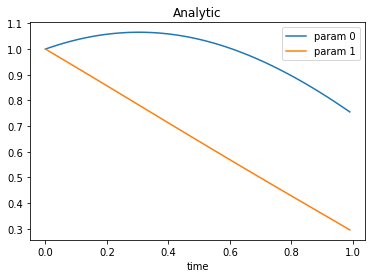

In [4]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Analytic")

In [5]:
# Through the circuit

ode = define_ode(ops, opsH, fs, hs, state = np.ones(4)/2)    # Define the diff. equation RHS as a function of the parameters

params_evolved = euler(ode, params_init, dt, Nt)              # Integrate in time!
# params_evolved = rk4(ode, params_init, dt, Nt) # Integrate in time!

Text(0.5, 1.0, 'Circuit')

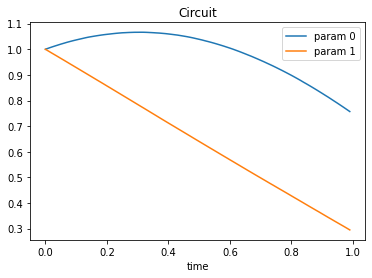

In [6]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Circuit")

In [22]:
n_qubits = 3
J = 1/2
B = 1/2
fs = [[-1j*J, -1j*J, -1j*J], [-1j*B, -1j*B, -1j*B]]
params = np.array([0.0, 0.0])
ops = [["ZZI", "IZZ", "ZIZ"], ["XII", "IXI", "IIX"]]
hs = [-J, -J, -J, -B, -B, -B]
opsH = ["ZZI", "IZZ", "ZIZ", "XII", "IXI", "IIX"]
vector = np.array([0.35355339,  0.35355339, 0.35355339, -0.35355339,
                   0.35355339, -0.35355339, -0.35355339, -0.35355339]) + 1j*0
vector = vector/np.linalg.norm(vector)
# Time discretization
dt = 0.01
Nt = 10

In [23]:
ode = define_ode(ops, opsH, fs, hs, analytic=True, state = vector)    # Define the diff. equation RHS as a function of the parameters

params_evolved = euler(ode, params_init, dt, Nt)              # Integrate in time!

Text(0.5, 1.0, 'Analytic')

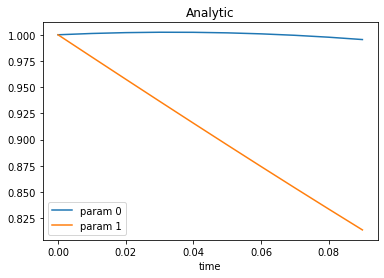

In [17]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Analytic")

In [19]:
ode = define_ode(ops, opsH, fs, hs, state = vector)    # Define the diff. equation RHS as a function of the parameters

params_evolved = euler(ode, params_init, dt, Nt)              # Integrate in time!

Text(0.5, 1.0, 'Circuit')

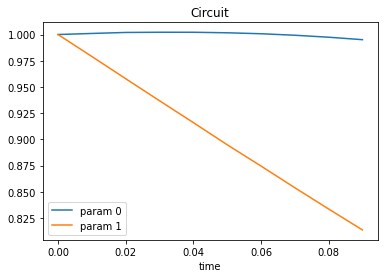

In [20]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Circuit")